In [1]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [4]:
df.shape

(155223, 19)

In [5]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [6]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [7]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [8]:
df.shape

(75345, 19)

## Feature Scaling

In [9]:
feature_scale = [feature for feature in df.columns if feature in ['density_per_km','precipMM']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target','latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,Target,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,pressure,visibility,winddirDegree,year,month,density_per_km,precipMM
0,1,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,1018,10,189,2016,3,0.505636,0.000000
1,0,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,1018,10,189,2016,3,0.505636,0.000000
2,0,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,1025,10,99,2016,3,0.505636,0.000000
3,1,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,1025,10,99,2016,3,0.505636,0.000000
4,0,-34.603684,-58.381559,22,18,0.0,8.6,26,15,17,61,78,1015,8,105,2016,4,0.505636,0.097011


# Train Test split

In [10]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10) #train test split in 50:50 ratio

In [11]:
X_train.head()

,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,pressure,visibility,winddirDegree,year,month,density_per_km,precipMM
18866,6.402013,-72.554634,25,13,0.0,11.6,11,17,6,40,90,1012,6,248,2016,4,0.000897,0.149179
39309,11.240355,-74.211023,17,10,0.0,11.6,53,10,11,20,74,1015,10,143,2016,8,0.011305,0.002931
70300,8.992761,-79.518348,30,25,0.0,11.9,56,23,11,37,79,1011,10,161,2017,6,0.324189,0.000879
49555,1.805165,-75.888340,19,13,0.0,11.6,36,13,8,41,86,1016,8,247,2016,11,0.003224,0.107855
27057,0.504929,-76.500191,22,20,0.0,7.8,48,21,6,75,98,1016,9,139,2016,5,0.001310,0.036928


# Naive Bayes

In [29]:
nbModel = GaussianNB()
nbModel.fit(X_train, y_train) 
nbModelpred = nbModel.predict(X_test)

print(confusion_matrix(y_test,nbModelpred))
print(accuracy_score(y_test,nbModelpred))
print(classification_report(y_test,nbModelpred))

[[ 9967 10342]
 [ 6316 11048]]
0.5578265601359064
              precision    recall  f1-score   support

           0       0.61      0.49      0.54     20309
           1       0.52      0.64      0.57     17364

    accuracy                           0.56     37673
   macro avg       0.56      0.56      0.56     37673
weighted avg       0.57      0.56      0.56     37673



In [30]:
from sklearn.metrics import precision_score
print(precision_score(y_test, nbModelpred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, nbModelpred), ": is the recall score")

from sklearn.metrics import f1_score
print(f1_score(y_test, nbModelpred), ": is the f1 score")

0.516503038803179 : is the precision score
0.636258926514628 : is the recall score
0.5701604995613357 : is the f1 score


### K Fold Cross Validation

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation=KFold(10)

model = GaussianNB() 
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('Max :',np.max(results))
print('Min :',np.min(results))
print('Mean :',np.mean(results))

[0.58248175 0.54200398 0.5402787  0.54372926 0.54426012 0.54698699
 0.52933369 0.50637112 0.39235466 0.48234669]
Max : 0.5824817518248175
Min : 0.39235465887974513
Mean : 0.5210146966576118


### Stratified K-fold Cross Validation

In [15]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = GaussianNB() 
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.48523228913684635


In [16]:
scores

array([0.51785003, 0.57876576, 0.533643  , 0.44021234, 0.5288653 ,
       0.54127953, 0.39009822, 0.40111495, 0.45288028, 0.46761349])

In [17]:
print('Max :',np.max(scores))
print('Min :',np.min(scores))
print('Mean :',np.mean(scores))

Max : 0.5787657597876577
Min : 0.3900982213963366
Mean : 0.48523228913684635


## Graphical Analysis

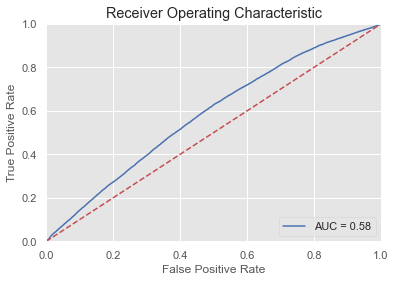

In [19]:
from sklearn.metrics import roc_curve, auc

probs               = nbModel.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tuning the model using grid searchCV
- var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean.
- In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.

In [22]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

model = GaussianNB() 

# define models and parameters

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)  # Calculation Stability to Widen (or Smooth) the Curve
}

cv = KFold(n_splits=10)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid_nb, verbose=1,cv=cv, n_jobs=1)
grid_result = grid_search.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best: 0.564531 using {'var_smoothing': 0.0015199110829529332}
0.542180 (0.007894) with: {'var_smoothing': 1.0}
0.542180 (0.007894) with: {'var_smoothing': 0.8111308307896871}
0.541994 (0.007678) with: {'var_smoothing': 0.657933224657568}
0.541888 (0.007696) with: {'var_smoothing': 0.533669923120631}
0.542498 (0.008317) with: {'var_smoothing': 0.43287612810830584}
0.544117 (0.008757) with: {'var_smoothing': 0.3511191734215131}
0.543056 (0.009070) with: {'var_smoothing': 0.2848035868435802}
0.543719 (0.009341) with: {'var_smoothing': 0.23101297000831597}
0.543294 (0.008547) with: {'var_smoothing': 0.1873817422860384}
0.544250 (0.008703) with: {'var_smoothing': 0.15199110829529336}
0.545392 (0.007773) with: {'var_smoothing': 0.12328467394420659}
0.549294 (0.008717) with: {'var_smoothing': 0.1}
0.556222 (0.010666) with: {'var_smoothing': 0.08111308307896872}
0.562327 (0.007839) with: {'var_smoothing': 0.0657933224657568}
0.56

In [23]:
accuracy = grid_result.best_score_
accuracy

0.5645308289610805

In [24]:
grid_result.best_params_

{'var_smoothing': 0.0015199110829529332}

## Model with parameters

In [31]:
nbModel2 = GaussianNB(var_smoothing=0.0015199110829529332)
nbModel2.fit(X_train, y_train) 
nbModelpred2 = nbModel2.predict(X_test)
print(confusion_matrix(y_test,nbModelpred2))
print(accuracy_score(y_test,nbModelpred2))
print(classification_report(y_test,nbModelpred2))

[[10809  9500]
 [ 7060 10304]]
0.5604278926552173
              precision    recall  f1-score   support

           0       0.60      0.53      0.57     20309
           1       0.52      0.59      0.55     17364

    accuracy                           0.56     37673
   macro avg       0.56      0.56      0.56     37673
weighted avg       0.57      0.56      0.56     37673



In [32]:
from sklearn.metrics import precision_score
print(precision_score(y_test, nbModelpred2), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, nbModelpred2), ": is the recall score")

from sklearn.metrics import f1_score
print(f1_score(y_test, nbModelpred2), ": is the f1 score")

0.5202989295091901 : is the precision score
0.5934116563003916 : is the recall score
0.5544554455445544 : is the f1 score


## Graphical Analysis

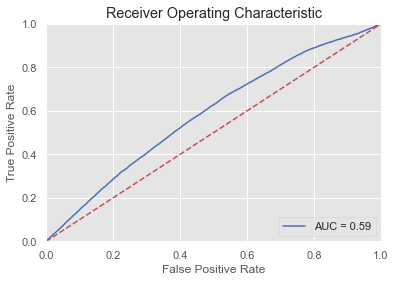

In [33]:
from sklearn.metrics import roc_curve, auc

probs               = nbModel2.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
print('Accuracy before tuning :',accuracy_score(y_test,nbModelpred))
print()
print('Accuracy after tuning :',accuracy_score(y_test,nbModelpred2))

Accuracy before tuning : 0.5578265601359064

Accuracy after tuning : 0.5604278926552173
